In [183]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV

# Question 1, 2 et 3

In [209]:
def simu(n,alpha,beta,display=False):
    if (alpha>1) | (alpha<0) |(beta>1) |(beta<0):
        raise ValueError('les paramètres ne sont pas bons')
    X = npr.uniform(0,1,(n,2)) # npr.rand(n,2)
    Y = np.zeros((n,1))
    for i in range(n):
        if abs(X[i,0]+2*X[i,1]) <=1:
            px= alpha
        else:
            px = beta
        Y[i] = npr.binomial(1,px)
    
    #plt.scatter(X[:,0],X[:,1],c=Y)
    # Apply the default theme
    
    sns.set_theme()

    # Créez un DataFrame à partir de vos données
    data = pd.DataFrame({'Feature1': X[:, 0].ravel(),
                         'Feature2': X[:, 1].ravel(), 'Target': Y.ravel()})

    # Utilisez Seaborn pour créer le scatter plot
    sns.scatterplot(data=data, x='Feature1', y='Feature2', hue='Target', palette='viridis')

    # Affichez le plot
    plt.show()
        
    
    return train_test_split(X,Y,test_size=0.3,random_state=42)
    
    
    

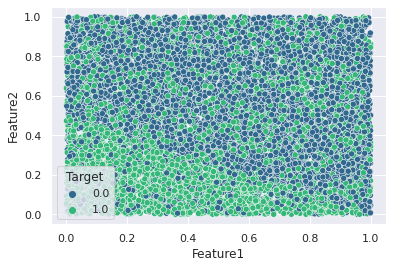

In [210]:
n = 10000

alpha = 0.8
beta = 0.3

X_train,X_test,Y_train,Y_test = simu(n, alpha, beta, display=False)


Exercice : programmer "à la main" la fonction train_test_split

In [211]:
def traintestsplitalamain(X,Y,trainsize):
    # Générez un tableau d'indices aléatoires pour l'ensemble d'entraînement
    sample_indices = np.random.choice(np.arange(0, len(X)), trainsize, replace=False)

    # Sélectionnez les échantillons correspondants à l'ensemble d'entraînement
    X_train = X[sample_indices]

    # Créez un masque booléen pour les indices qui ne sont pas dans l'ensemble d'entraînement
    test_mask = np.ones(len(X), dtype=bool)
    test_mask[sample_indices] = False #met du faux ou les indices sont pris 


    # Sélectionnez les échantillons correspondant à l'ensemble de test en utilisant le masque
    X_test = X[test_mask]
    
    
    return X_train,X_test, Y_train,Y_test


rate_test =0.8
trainsize= int(np.floor(rate_test*n))

X_train,X_test, Y_train,Y_test = traintestsplitalamain(X,Y,trainsize)
    
X_train.shape  

(8000, 2)

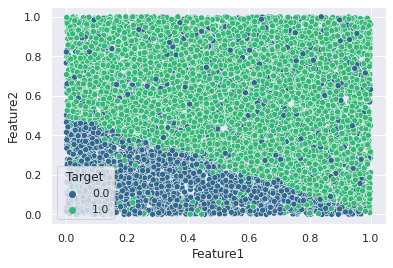

In [264]:
X_train, X_test, y_train, y_test = simu(10000, .1, .9)

In [153]:
X_train.shape
y_train.shape

(210, 1)

# Question 4

Consulter la classe KNeighborsClassifier de sklearn

In [231]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(np.array([[0.5,0.5],[0.25,0.75]]))
y_pred

array([1., 1.])

In [214]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train.ravel())
y_pred1 = knn1.predict(X_test)
y_pred1


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.])

In [215]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train,y_train.ravel())
y_pred20 = knn20.predict(X_test)
y_pred20

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

# Question 5, 6, 7 et 8

In [252]:
def evaluate(clf, X_train, X_test, y_train, y_test, display=False):

    clf.fit(X_train,y_train.ravel())
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    correctly_classified = X_test[y_test.ravel() == y_pred.ravel()]
    misclassified = X_test[y_test.ravel() != y_pred.ravel()]
    
    if display:
        
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

        


        # Tracer les points correctement classés en bleu et les points mal classés en rouge
        
        plt.figure(figsize=(10, 10)) 
        
        plt.subplot(121)
        sns.scatterplot(x=correctly_classified[:, 0],
                        y=correctly_classified[:, 1],
                        color='blue', 
                        label='Correctement classés')
        
        sns.scatterplot(x=misclassified[:, 0],
                        y=misclassified[:, 1],
                        color='red', label='Mal classés')

        plt.xlabel('Caractéristique 1')
        plt.ylabel('Caractéristique 2')
        plt.legend()
        plt.title('Points correctement classés et mal classés')
        plt.subplot(122)

        plt.scatter(correctly_classified[:, 0],correctly_classified[:, 1],
                        c= y_test[y_test.ravel()==y_pred.ravel()], 
                        label='Correctement classés')
        sns.scatterplot(x=misclassified[:, 0],
                        y=misclassified[:, 1],
                        color='red', label='Mal classés')
        plt.xlabel('Caractéristique 1')
        plt.ylabel('Caractéristique 2')
        plt.legend()
        plt.title('Points correctement classés et mal classés avec leur type en plus')
        plt.show()

    
    
    return score


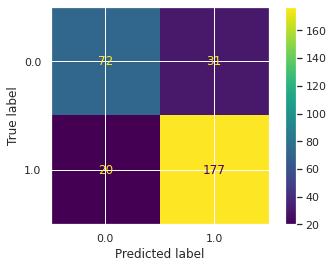

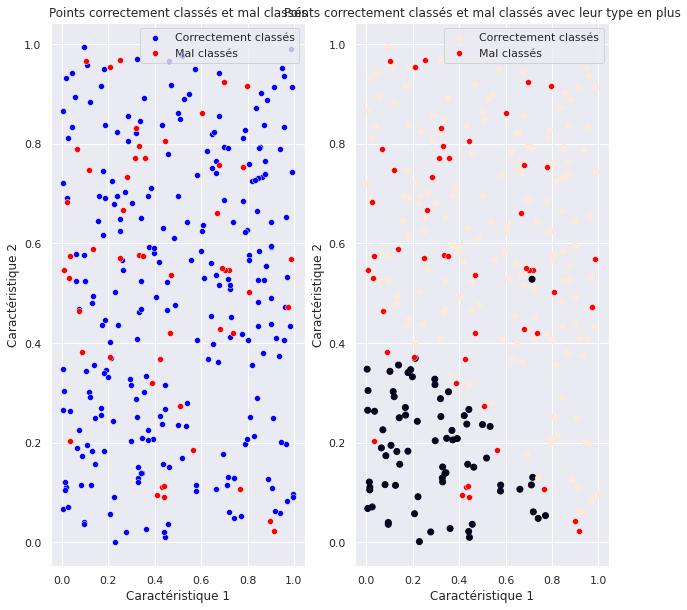

0.83

In [253]:
knn1 = KNeighborsClassifier(n_neighbors=1)
evaluate(knn1, X_train, X_test, y_train, y_test, display=True)

In [254]:
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, y_train, y_test, display=False)

0.88

# Question 9

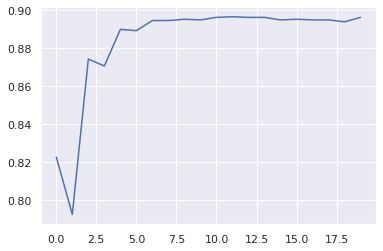

In [265]:
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
scores = []

for clf in clfs:
    scores.append(evaluate(clf, X_train, X_test, y_train, y_test, display=False))
    
plt.plot(scores)
    
## Afficher le graphe de l'évolution de l'accuracy


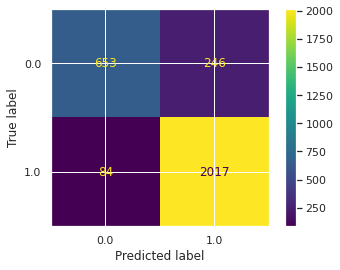

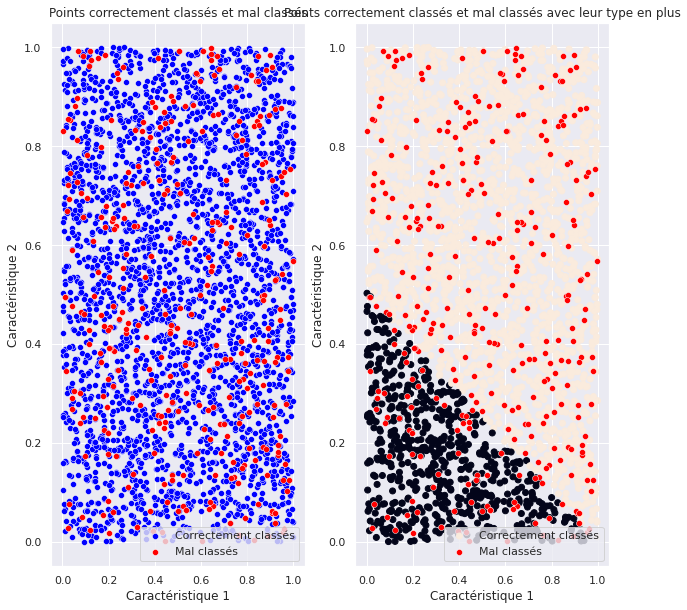

0.89

In [266]:
knn5 = KNeighborsClassifier(n_neighbors=5)
evaluate(knn5, X_train, X_test, y_train, y_test, display=True)

In [267]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Créer un modèle KNN avec 5 voisins
knn = KNeighborsClassifier(n_neighbors=5)

# Effectuer une validation croisée en utilisant cross_val_score
# Ici, nous utilisons une validation croisée à 5 plis (cv=5), mais vous pouvez changer cela selon vos besoins.
scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5)

# Afficher les scores de validation croisée pour chaque pli
print("Scores de validation croisée:", scores)

# Calculer la moyenne des scores pour obtenir une estimation de la performance moyenne du modèle
mean_accuracy = np.mean(scores)
print("Précision moyenne (validation croisée):", mean_accuracy)

Scores de validation croisée: [0.89428571 0.89142857 0.9        0.89714286 0.88642857]
Précision moyenne (validation croisée): 0.8938571428571429


In [268]:
# Créer un modèle KNN
knn = KNeighborsClassifier()

# Définir une grille d'hyperparamètres à rechercher
param_grid = {'n_neighbors': range(1,21)}

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,scoring='f1')

# Effectuer la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='f1')

In [269]:

# Afficher les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Obtenir le modèle avec les meilleurs hyperparamètres
best_knn = grid_search.best_estimator_

Meilleurs hyperparamètres: {'n_neighbors': 11}


In [270]:
# Évaluer le modèle avec les meilleurs hyperparamètres sur les données de test
y_pred_test = best_knn.predict(X_test)
accuracy = accuracy_score(y_pred_test,y_test)

print("Précision sur les données de test avec les meilleurs hyperparamètres:", accuracy)


Précision sur les données de test avec les meilleurs hyperparamètres: 0.8963333333333333


Exercice : tester avec d'autres métriques, voir https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.